# The HOMFLY Polynomials of Even-Crossing Trigonal Bipyramid Links

A Python module `homfly.py` is developed for calculating the HOMFLY polynomials of oriented links. It is now only supported for even-crossing trigonal bipyramid links. The following shows the algorithm procedures and the ways to use it. Futhermore, we will walk through the journey of calculating all even-crossing OTBL HOMFLY Polynomials, comparing them to find different items, and deducing their topological chirality.

## Flowchart of HOMFLY Polynomial Calculation

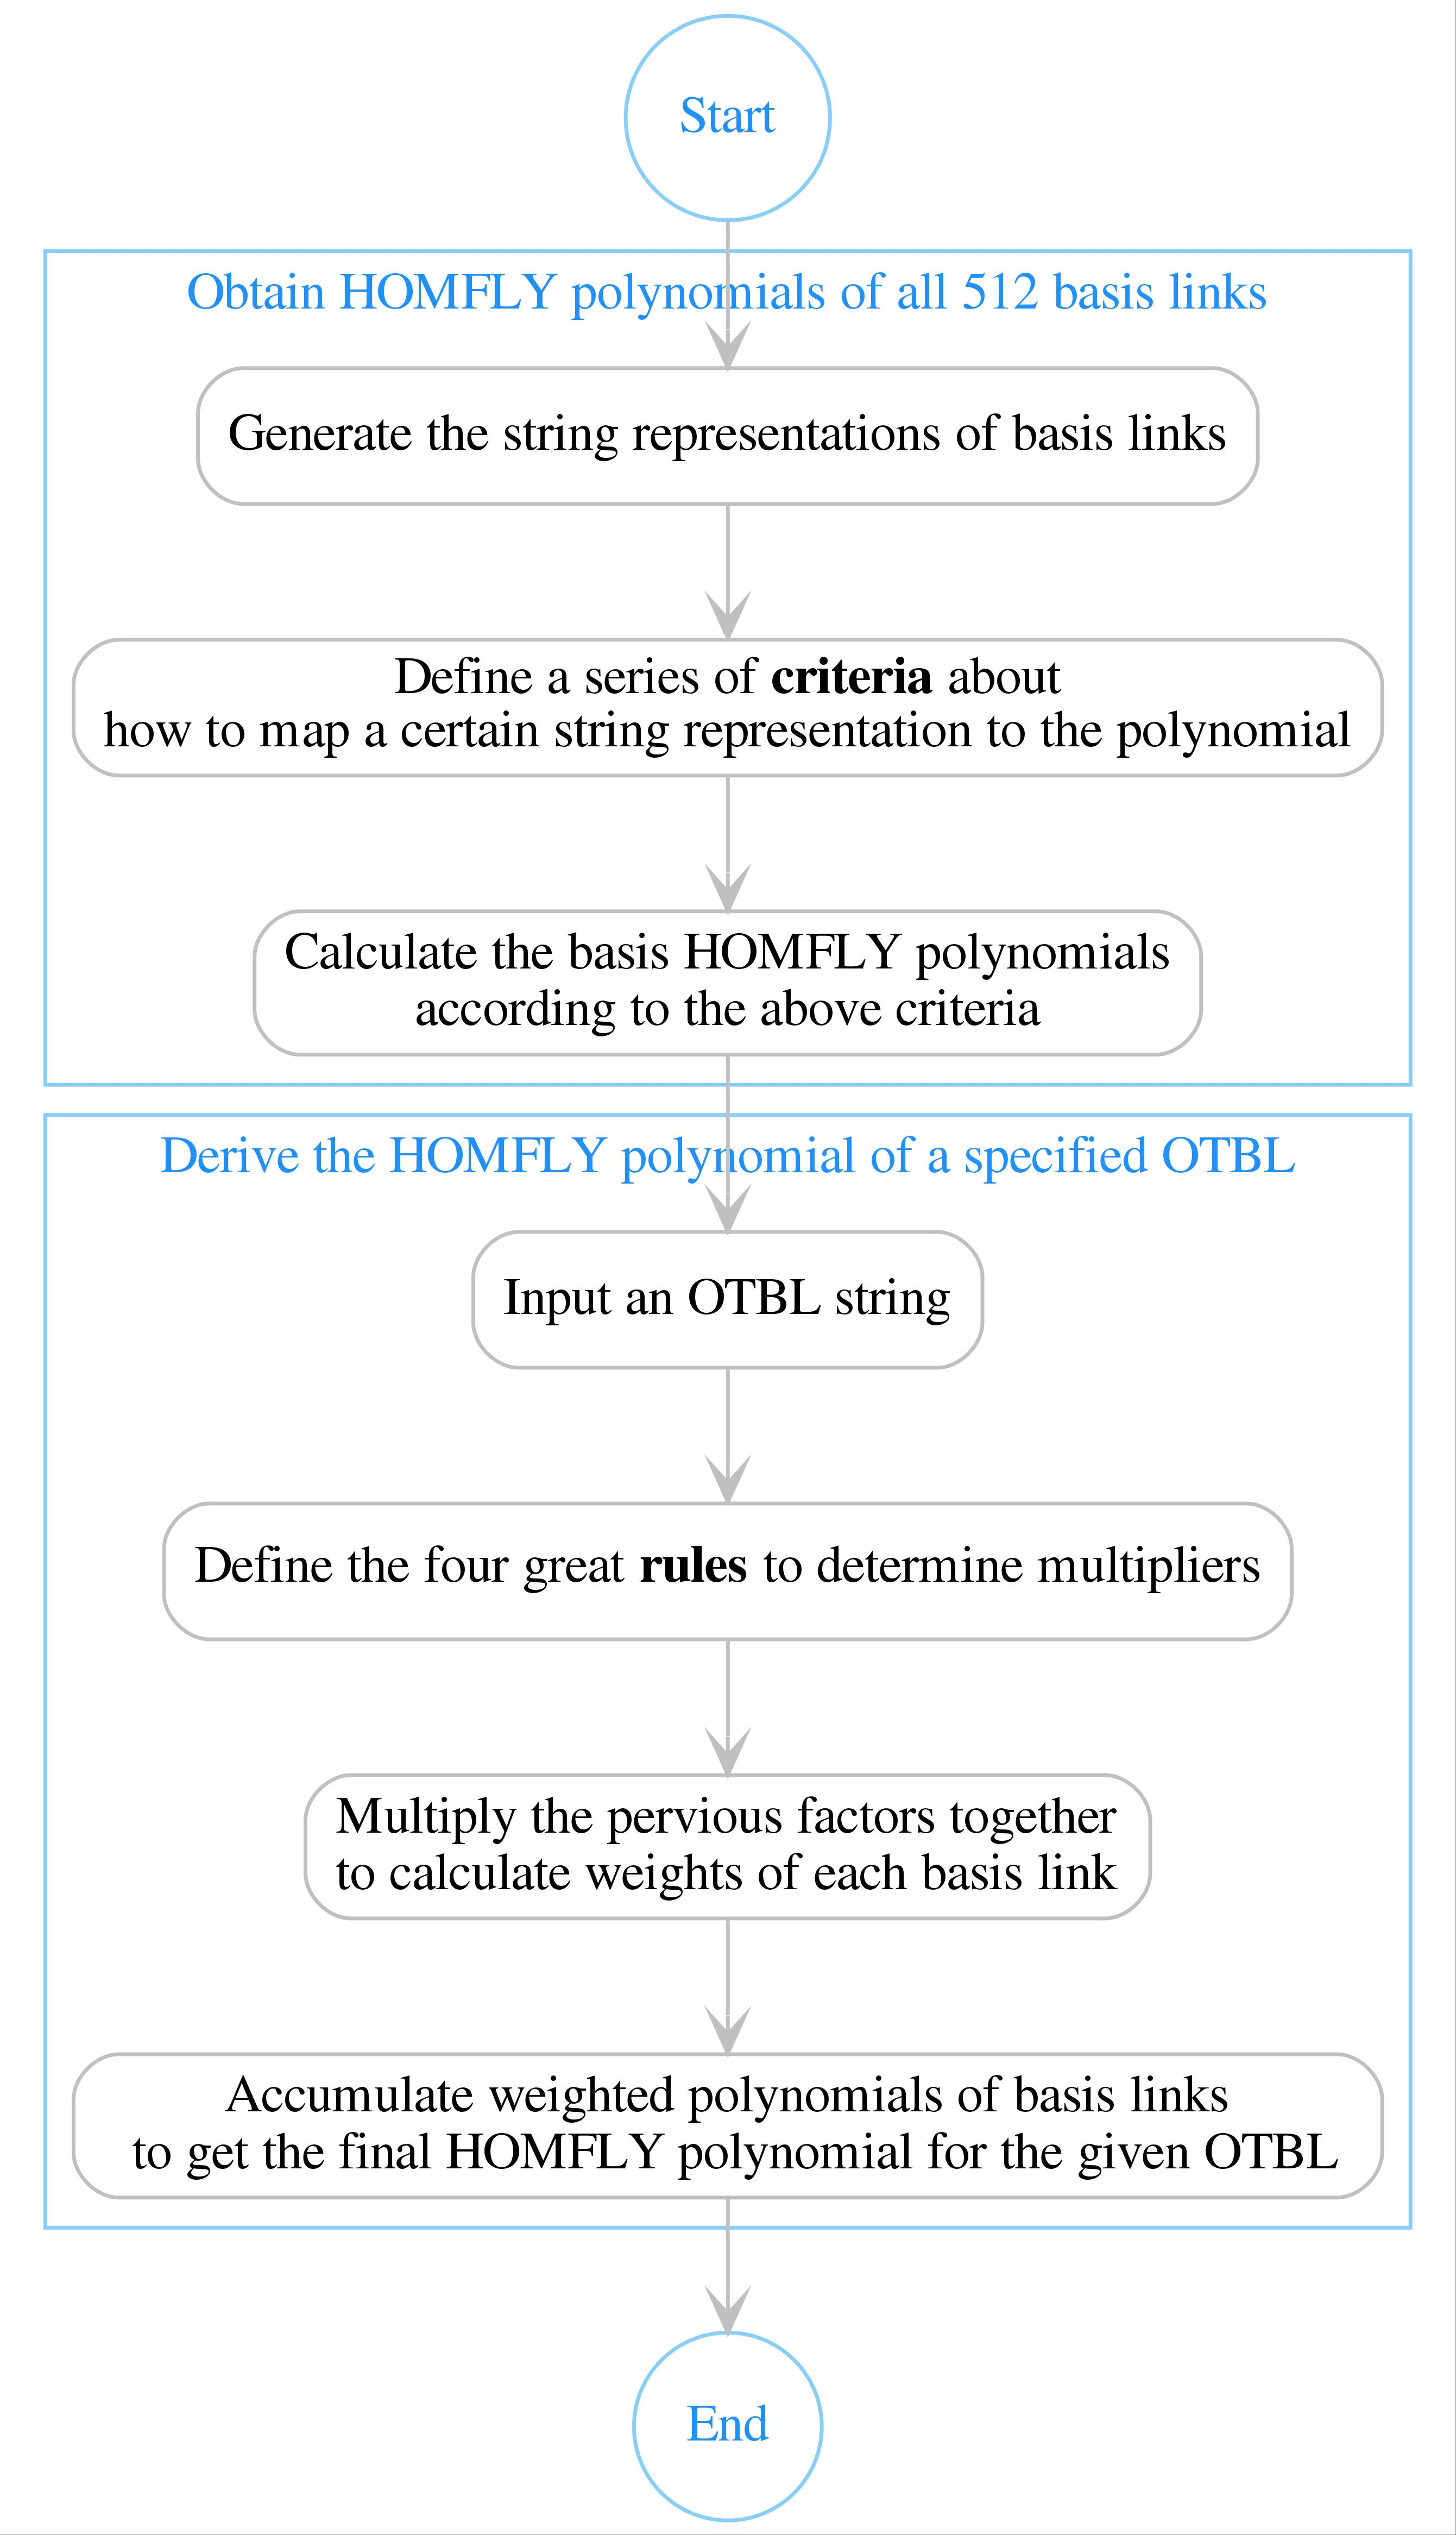

In [1]:
from IPython.display import Image
Image(filename='images/homfly-calculation-flowchart.jpg', width=500)

## A Simple Instance

The code implementation of the above workflow is stored in the `src` directory. Here, we will just import it, and carry out on a small test intance to see how to use it.

In [2]:
import sys
sys.path.append('src')

In [3]:
from homfly import link, homfly_for_even_cross_otbl
from sympy import *

otbl = link()
otbl.string = "ah ah av ah ah ah ah av av".split()
otbl.homfly = homfly_for_even_cross_otbl(otbl)
simplify(otbl.homfly)

v**(-46*n - 2)*(v**(50*n)*(v**2 - 1)**10*(v**(2*n)*(v**(2*n) - 1)**3 + 3*v**(2*n)*(v**(2*n) - 1)**2 + 3*v**(2*n)*(v**(2*n) - 1) - (v**(2*n) - 1)**2 + 1) + v**(40*n + 4)*z**4*(v**2 - 1)**6*(v**(2*n) - 1)**6 + 3*v**(40*n + 6)*z**6*(v**2 - 1)**4*(v**(2*n) - 1)**7 + 3*v**(40*n + 8)*z**8*(v**2 - 1)**2*(v**(2*n) - 1)**8 + v**(40*n + 10)*z**10*(v**(2*n) - 1)**9 - 6*v**(42*n + 4)*z**4*(v**2 - 1)**6*(v**(2*n) - 1)**5 - v**(42*n + 6)*z**6*(v**2 - 1)**4*(v**(2*n) - 1)**6*(v**(2*n) + 17) - v**(42*n + 8)*z**8*(v**2 - 1)**2*(v**(2*n) - 1)**7*(2*v**(2*n) + 15) - 4*v**(42*n + 10)*z**10*(v**(2*n) - 1)**8 + v**(44*n + 4)*z**4*(v**2 - 1)**6*(v**(2*n) - 1)**4*(4*v**(2*n) + 11) + v**(44*n + 6)*z**6*(v**2 - 1)**4*(v**(2*n) - 1)**5*(15*v**(2*n) + (v**(2*n) - 1)**2 + 26) + 2*v**(44*n + 8)*z**8*(v**2 - 1)**2*(v**(2*n) - 1)**6*(7*v**(2*n) + 8) + v**(46*n + 2)*z**4*(v**2 - 1)**6*(v**(2*n) - 1)**2*(18*v**2*(1 - v**(2*n)) - 5*v**2*(v**(2*n) - 1)**3 - 27*v**2*(v**(2*n) - 1)**2 + 15*v**(2*n + 2)*(v**(2*n) - 1)**3 + 

## Calculating HOMFLY Polynomials of All $2n$ OTBLs

Next, we will derive HOMFLY Polynomials of all those even-crossing oriented trigonal bipyramid links, which is saved in `data/even-cross-otbls.txt` file as strings.

In [4]:
import pyprind

otbls = []; pbar = pyprind.ProgBar(104)
with open('data/even-cross-otbls.txt', 'rt') as in_file:
    for line in in_file:
        otbl = link()
        otbl.string = line.split()
        otbl.homfly = homfly_for_even_cross_otbl(otbl)
        otbl.homfly = simplify(otbl.homfly)
        otbls.append(otbl)
        pbar.update()

with open('data/otbls-homfly.txt', 'wt') as out_file:
    for otbl in otbls:
        print(latex(otbl.homfly), file=out_file)

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:15:58


## Comparing Expressions to Find OTBLs with Different Polynomials

So far as we obtained the polynomials, we can identify OTBLs that must be diferent from each other.

In [5]:
homflys = [otbl.homfly for otbl in otbls]
diff_set = {otbl.homfly for otbl in otbls}
diff_arr = list(diff_set)
diff_idx = [homflys.index(item) for item in diff_arr]
diff_idx.sort()
print(f'These OTBLs are different with each other ({len(diff_idx)}):', diff_idx, sep='\n')

diff_otbls = [otbls[i] for i in diff_idx]
with open('data/diff-otbls-homfly.txt', 'wt') as out_file:
    for diff_otbl in diff_otbls:
        print(latex(diff_otbl.homfly), file=out_file)

These OTBLs are different with each other (74):
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34, 35, 36, 37, 44, 45, 46, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 67, 68, 69, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 91, 93, 96, 97, 99, 100, 101, 102, 103]


It show that 74 OTBLs in 104 are certainly distinct.

## The Topological Chirality of OTBLs

Judging their topological chirality by taking the advantage of the property of HOMFLY polynormial.

In [6]:
from homfly import v

chiral_idx = []
for i, diff_otbl in enumerate(diff_otbls):
    if diff_otbl.homfly != diff_otbl.homfly.subs(v, -v**(-1)):
        chiral_idx.append(i)
print(f'These OTBLs are chiral ({len(chiral_idx)}):', chiral_idx, sep='\n')

These OTBLs are chiral (74):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


From the above results, all of these $2n$-crossing OTBLs are topologically chiral, which in turn are certainly chemically chiral.

## Conclusions

In our [preceding work](https://doi.org/10.1016/j.jmgm.2019.107492), we had identified all topological structures of the DNA trigonal, discovering that accurately 451 kinds of rotationally distinct links are permissible. And only 104 types among them can be produced by the method of one-step self-assembly of six DNA single-strands used by C. M. Erben et al.

And now, the HOMFLY polynomials of these even-crossing links are derived relying on the new algorithm developed by us. This approach to deriving the HOMFLY polynomials is universal, that is to say, this method is applicable to any polyhedral link that owns an even number of crossings on each edge. Based on the resulting HOMFLY polynomial, the topological chirality of the links is naturally obtained from the property of the polynomial, showing that all of them are chiral.